# Netflix data analysis 


# Preparing data for analysis

## Reading the dataset

In [44]:
import pandas as pd
import numpy as np

In [45]:
file_path = (r'C:\Users\arailym\PycharmProjects\database analysis\data\netflix_data.csv')
netflix_data = pd.read_csv(file_path)

In [46]:
netflix_data.shape

(8793, 10)

In [47]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8793 non-null   object 
 1   type          8793 non-null   object 
 2   title         8791 non-null   object 
 3   director      8740 non-null   object 
 4   country       8786 non-null   object 
 5   date_added    8793 non-null   object 
 6   release_year  8792 non-null   float64
 7   rating        8793 non-null   object 
 8   duration      8787 non-null   object 
 9   listed_in     8791 non-null   object 
dtypes: float64(1), object(9)
memory usage: 687.1+ KB


In [48]:
netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020.0,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021.0,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Dataset cleaning

### Missing values

In [49]:
# identify missing values
netflix_data.isnull().sum()

show_id          0
type             0
title            2
director        53
country          7
date_added       0
release_year     1
rating           0
duration         6
listed_in        2
dtype: int64

In [50]:
# deleting missing values, which are few in 1 column
netflix_data.dropna(subset=['title', 'director', 'release_year', 'listed_in', 'date_added'], inplace=True)

# replacing missing values, which are a lot in 1 column
netflix_data.fillna({'director': 'Unknown', 'country': 'Unknwon', 'duration': 'Unknown'}, inplace=True)

# check deleted rows
netflix_data.shape

(8736, 10)

### Date formatting

In [51]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

### Duration standartisation

In [52]:
# separate values in duration columns and drop original duration column
netflix_data['seasons'] = netflix_data['duration'].apply(lambda x: int(x.split(' ')[0]) if 'Season' in x else None)
netflix_data['duration_min'] = netflix_data['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else None)
netflix_data.drop(columns=['duration'], inplace=True)

In [53]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8736 entries, 0 to 8792
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8736 non-null   object        
 1   type          8736 non-null   object        
 2   title         8736 non-null   object        
 3   director      8736 non-null   object        
 4   country       8736 non-null   object        
 5   date_added    8734 non-null   datetime64[ns]
 6   release_year  8736 non-null   float64       
 7   rating        8736 non-null   object        
 8   listed_in     8736 non-null   object        
 9   seasons       2614 non-null   float64       
 10  duration_min  6116 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 819.0+ KB


In [54]:
netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,seasons,duration_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020.0,PG-13,Documentaries,NaN,90.0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021.0,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",1.0,NaN
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021.0,TV-MA,"TV Dramas, TV Horror, TV Mysteries",1.0,NaN
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021.0,TV-PG,"Children & Family Movies, Comedies",NaN,91.0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993.0,TV-MA,"Dramas, Independent Movies, International Movies",NaN,125.0


### Delete duplicate rows


In [55]:
netflix_data.drop_duplicates(inplace=True)
netflix_data.shape

(8733, 11)

### Data transformation


In [56]:
# converting to categorical encoding
netflix_data[['type', 'rating', 'listed_in']] = netflix_data[['type', 'rating', 'listed_in']].astype('category')

# converting column to integer
netflix_data['release_year'] = netflix_data['release_year'].astype(int)

# grouping 'release_year' column by decade
netflix_data['decade'] = (netflix_data['release_year'] // 10) * 10



## Save cleaned dataframe

In [57]:
netflix_data.to_csv(r'C:\Users\arailym\PycharmProjects\database analysis\data\netflix_data_analysis_cleaned_and_transformed.csv', index=False)

# Data analysis


In [58]:
import pandas as pd
file_path = (r'C:\Users\arailym\PycharmProjects\database analysis\data\netflix_data_analysis_cleaned_and_transformed.csv')
nf_df = pd.read_csv(file_path)
nf_df.head()


,show_id,type,title,director,country,date_added,release_year,rating,listed_in,seasons,duration_min,decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,Documentaries,NaN,90.0,2020
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",1.0,NaN,2020
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",1.0,NaN,2020
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,"Children & Family Movies, Comedies",NaN,91.0,2020
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",NaN,125.0,1990


In [59]:
# identify missing values
nf_df.isnull().sum()

show_id            0
type               0
title              0
director           0
country            0
date_added         2
release_year       0
rating             0
listed_in          0
seasons         6122
duration_min    2617
decade             0
dtype: int64

In [60]:
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8733 non-null   object 
 1   type          8733 non-null   object 
 2   title         8733 non-null   object 
 3   director      8733 non-null   object 
 4   country       8733 non-null   object 
 5   date_added    8731 non-null   object 
 6   release_year  8733 non-null   int64  
 7   rating        8733 non-null   object 
 8   listed_in     8733 non-null   object 
 9   seasons       2611 non-null   float64
 10  duration_min  6116 non-null   float64
 11  decade        8733 non-null   int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 818.8+ KB


In [61]:
# top 5 genres
genres = nf_df['listed_in'].str.split(',').explode().str.strip()
genre_counts = genres.value_counts()
top_5_genres = genre_counts.head(5)
print(top_5_genres)

listed_in
International Movies      2748
Dramas                    2423
Comedies                  1670
International TV Shows    1333
Documentaries              869
Name: count, dtype: int64


In [62]:
# country contribution
country_counts = nf_df['country'].value_counts().head(5)
print(country_counts)

country
United States     3223
India             1056
United Kingdom     635
Pakistan           403
Not Given          286
Name: count, dtype: int64


In [63]:
# rating distribution
rating_distribution = nf_df.groupby(['type', 'rating']).size().reset_index(name = 'count')
print(rating_distribution)

       type    rating  count
0     Movie         G     41
1     Movie     NC-17      3
2     Movie        NR     75
3     Movie        PG    287
4     Movie     PG-13    490
5     Movie         R    797
6     Movie     TV-14   1423
7     Movie      TV-G    126
8     Movie     TV-MA   2060
9     Movie     TV-PG    540
10    Movie      TV-Y    131
11    Movie     TV-Y7    139
12    Movie  TV-Y7-FV      5
13    Movie        UR      3
14  TV Show        NR      4
15  TV Show         R      2
16  TV Show     TV-14    720
17  TV Show      TV-G     94
18  TV Show     TV-MA   1119
19  TV Show     TV-PG    314
20  TV Show      TV-Y    171
21  TV Show     TV-Y7    188
22  TV Show  TV-Y7-FV      1


In [64]:
# top 5 directors
directors = nf_df['director'].value_counts().reset_index()
directors.columns = ['director', 'type']
top_5 = directors.head(5)

print(top_5)

                 director  type
0               Not Given  2535
1           Rajiv Chilaka    20
2     Alastair Fothergill    18
3  Raúl Campos, Jan Suter    18
4             Suhas Kadav    16


In [65]:
# Group by 'release_year' and count the number of titles per year
titles_by_year = nf_df.groupby('release_year').size().reset_index(name='title_count')

# Sort the values by 'release_year' in ascending order
titles_by_year_sorted = titles_by_year.sort_values(by='release_year')

# Display the data to check the changes over the years
print(titles_by_year_sorted)

    release_year  title_count
0           1925            1
1           1942            2
2           1943            3
3           1944            3
4           1945            4
..           ...          ...
69          2017         1027
70          2018         1144
71          2019         1020
72          2020          946
73          2021          565

[74 rows x 2 columns]


In [66]:
# average length of movies
movies_df = nf_df[nf_df['type'] == 'movie']
average_duration = movies_df['duration_min'].mean()
print(average_duration)

nan


In [67]:
nf_df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'seasons', 'duration_min',
       'decade'],
      dtype='object')

# Data visualization

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = (r'C:\Users\arailym\PycharmProjects\database analysis\data\netflix_data_analysis_cleaned_and_transformed.csv')
nf_df = pd.read_csv(file_path)
nf_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,seasons,duration_min,decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,Documentaries,NaN,90.0,2020
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",1.0,NaN,2020
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",1.0,NaN,2020
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,"Children & Family Movies, Comedies",NaN,91.0,2020
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",NaN,125.0,1990


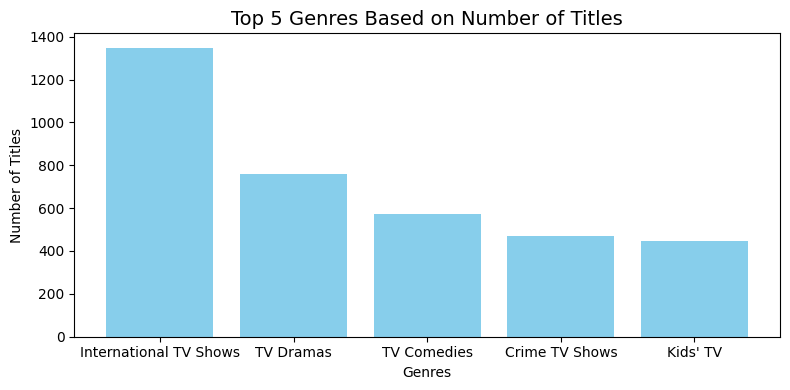

In [69]:
# top 5 genres 
genres = ['International TV Shows', 'TV Dramas', 'TV Comedies', 'Crime TV Shows', "Kids' TV"]
title_counts = [1348, 761, 573, 468, 447]

# Create bar chart
plt.figure(figsize=(8, 4))  # Set figure size
plt.bar(genres, title_counts, color='skyblue')  # Bar chart

# Add title and labels
plt.title('Top 5 Genres Based on Number of Titles', fontsize=14)
plt.xlabel('Genres', fontsize=10)
plt.ylabel('Number of Titles', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

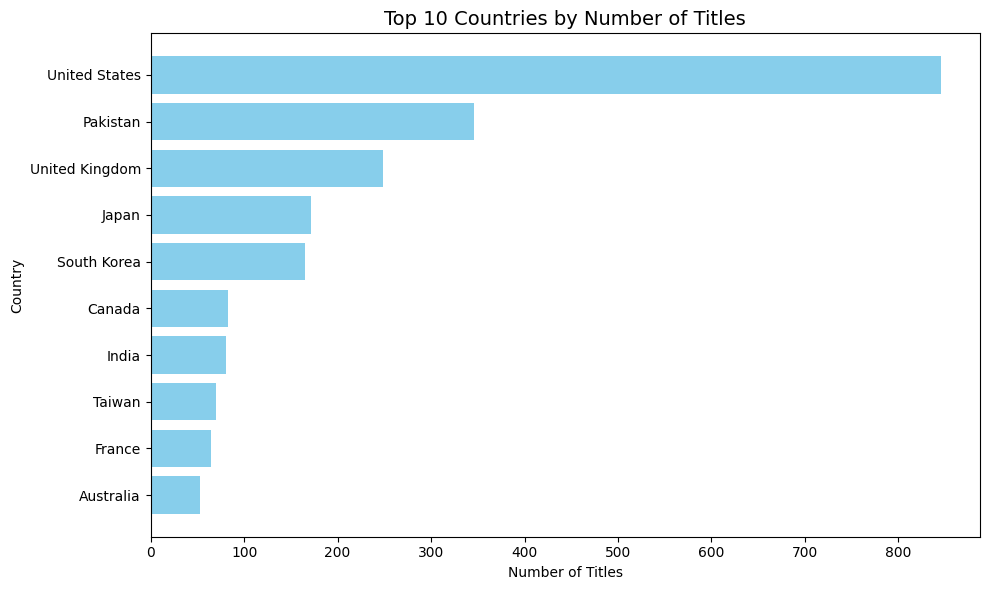

In [70]:
# top 10 country contribution

country_data = {
    'country': ['United States', 'Pakistan', 'United Kingdom', 'Japan', 'South Korea',
                'Canada', 'India', 'Taiwan', 'France', 'Australia'],
    'country_count': [845, 346, 249, 172, 165, 83, 81, 70, 65, 53]
}

# Create a DataFrame
country_df = pd.DataFrame(country_data)

# Sort the DataFrame in descending order based on 'country_count'
country_df = country_df.sort_values(by='country_count', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(country_df['country'], country_df['country_count'], color='skyblue')

# Add labels and title
plt.xlabel('Number of Titles', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.title('Top 10 Countries by Number of Titles', fontsize=14)

# Invert the y-axis to display the largest count at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()

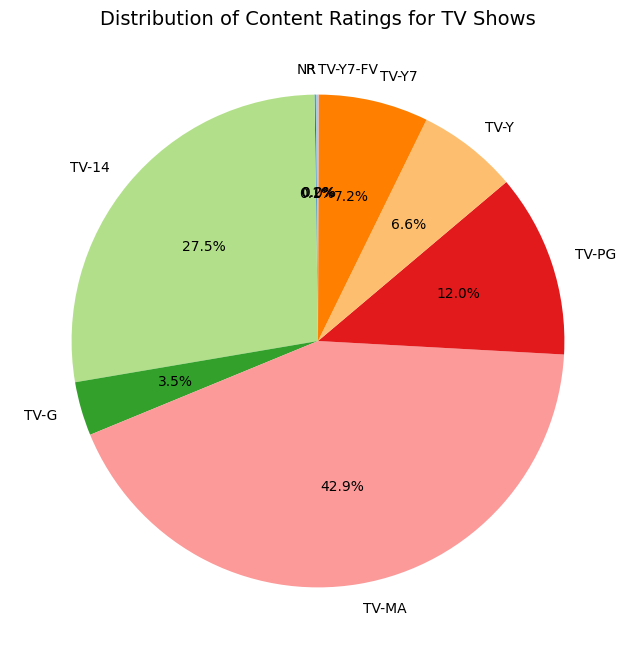

In [71]:
# Rating distribution

data = {
    'type': ['TV Show', 'TV Show', 'TV Show', 'TV Show', 'TV Show', 'TV Show', 'TV Show', 'TV Show', 'TV Show'],
    'rating': ['NR', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV'],
    'count': [4, 2, 730, 94, 1141, 320, 175, 192, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['count'], labels=df['rating'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Distribution of Content Ratings for TV Shows', fontsize=14)

# Show the plot
plt.show()

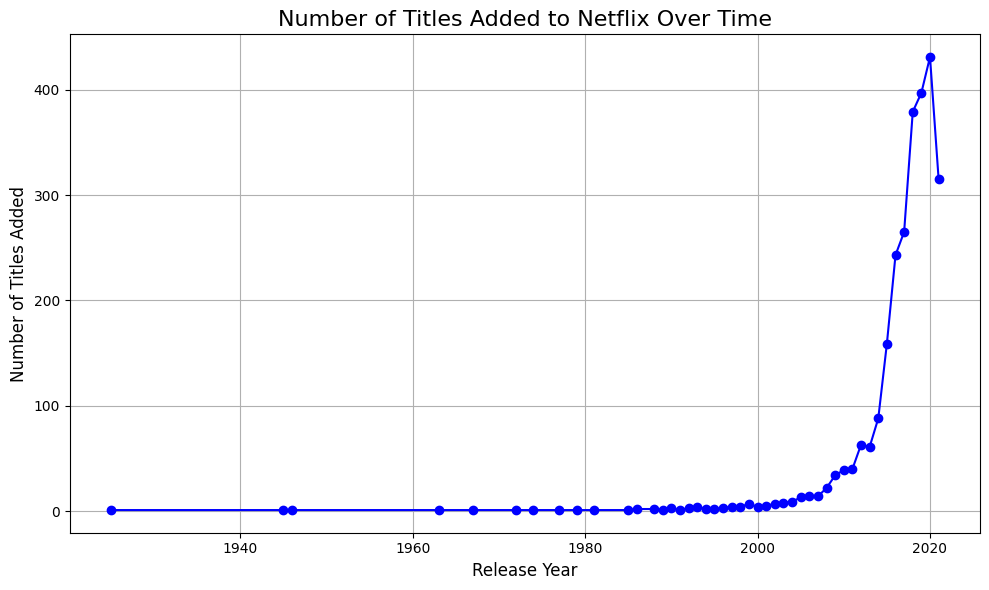

In [72]:
# Trend analysis

data = {
    'release_year': [1925, 1945, 1946, 1963, 1967, 1972, 1974, 1977, 1979, 1981, 
                     1985, 1986, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 
                     1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 
                     2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 
                     2016, 2017, 2018, 2019, 2020, 2021],
    'title_count': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                    1, 2, 2, 1, 3, 1, 3, 4, 2, 2, 
                    3, 4, 4, 7, 4, 5, 7, 8, 9, 13, 
                    14, 14, 22, 34, 39, 40, 63, 61, 88, 159, 
                    243, 265, 379, 397, 431, 315]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['release_year'], df['title_count'], marker='o', color='b')

# Add labels and title
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.title('Number of Titles Added to Netflix Over Time', fontsize=16)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

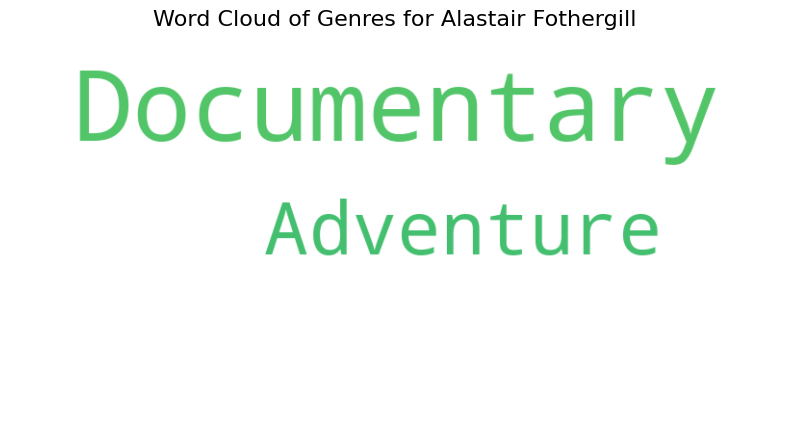

In [73]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data - replace this with your actual data
data = {
    'director': ['Alastair Fothergill', 'Mark Thornton', 'Todd Kauffman', 'Stan Lathan',
                 'Alastair Fothergill', 'Alastair Fothergill'],
    'genre': ['Documentary', 'Adventure', 'Family', 'Drama',
              'Adventure', 'Documentary']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Filter genres for the top director
top_director = 'Alastair Fothergill'
genres = df[df['director'] == top_director]['genre']

# Create a string of genres for the word cloud
genres_string = ' '.join(genres)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_string)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title(f'Word Cloud of Genres for {top_director}', fontsize=16)
plt.show()
